# Convex Optimization

## StatML: Lecture 4

### Prof. James Sharpnack

### Reading: "Convex Optimization" Boyd and Vandenberghe Ch. 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Cross validation

Recall that we fit on training set and tested (validated) on test set.  

- We lose much of the data in training if we make test set large
- But if test set is small then the error estimate is noisy

To "stabilize" the test error we can draw a new test set and then average the resulting test errors, this is called *cross-validation*.

### Cross validation

**K-fold cross-validation**
1. Partition data into K sets of size $n/K$ randomly.
2. For each set $i = 1,\ldots,K$:
   1. Fit on all data but the set $i$
   2. Test on set $i$
   3. Obtain test error $e_i$
3. Return error estimate $\frac 1K \sum_i e_i$

**Leave-one-out CV:** Set $K = n$, each sample is its own holdout.

### Convexity 

**Def** A function $f : \mathbb R^p \to \mathbb R$ is convex if for any $0 \le \alpha \le 1$, $x_0, x_1 \in \mathbb R^p$,
$$
f(\alpha x_0 + (1 - \alpha) x_1) \le \alpha f(x_0) + (1 - \alpha) f(x_1).
$$
<img src="convex.png" width=50%>

### Convex Optimization

**Def** Convex optimization is a problem where you must find an argmin of a convex function with convex function constraints.
$$
\min_{x \in \mathbb R^p} f(x) 
$$
subject to constraints:
$$
g_i(x) \le 0, \quad i=1,\ldots,m
\tag{Inequality cons.}
$$
$$
h_j(x) = 0, \quad j = 1,\ldots,r
\tag{Equality cons.}
$$
where $f,g_i$ are convex and $h_j$ is affine (i.e. $h_j(x) = A_j x + b_j$).

### Optima

> For convex functions, local minima are global minima

**Def.** Local minimum is a point $x_0$ such that there is a $\rho > 0$ such that for all $x_1 : \|x_1 - x_0\| \le \rho$,
$$
f(x_0) \le f(x_1)
$$
Global minimum is $x_0$ such that for all $x_1$,
$$
f(x_0) \le f(x_1)
$$

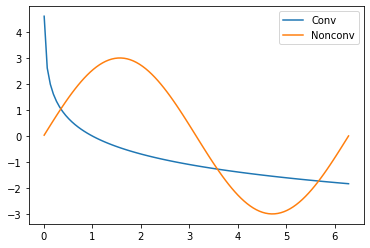

In [2]:
T = np.linspace(0.01,2*np.pi,100)
plt.plot(T,-np.log(T),label='Conv')
plt.plot(T,3*np.sin(T),label='Nonconv')
plt.legend()

### Conditions of convexity

**1st Order Condition** If f is differentiable then it is convex if 
$$
f(x) \ge f(x_0) + \nabla f(x_0)^\top (x - x_0), \forall x,x_0
$$
**2nd Order Condition** If f is twice differentiable then it is convex if 
$$
x^\top (\nabla^2 f(x)) x \ge 0, \forall x \tag{positive semi-definite}
$$

Note that $\nabla f(x_0)$ is the gradiant of $f(x)$ at $x=x_0$, and the $\nabla^2 f(x_0)$ is the Hessian of $f(x)$ at $x=x_0$.
$$
\text{Gradiant} = \nabla = \begin{pmatrix}
                \frac {\partial}{\partial x}\\
                \frac {\partial}{\partial y}\\
                \end{pmatrix}
$$
$$
\text{Hesian}= \nabla^2 = \nabla \nabla^\top  = \begin{pmatrix}
                \frac {\partial}{\partial x}\\
                \frac {\partial}{\partial y}\\
                \end{pmatrix}
                 (\frac {\partial}{\partial x} \quad \frac {\partial}{\partial y})

    = \begin{pmatrix}
    \frac {\partial^2}{\partial x^2} &  \frac {\partial^2}{\partial x y} \\
    \frac {\partial^2}{\partial  yx}  & \frac {\partial^2}{\partial y^2}\\
    \end{pmatrix}
$$  
$$
\text{Laplacian} = \Delta = \nabla \cdot \nabla = \nabla^\top \nabla = (\frac {\partial}{\partial x} \quad \frac {\partial}{\partial y}) \cdot 
\begin{pmatrix}
                \frac {\partial}{\partial x}\\
                \frac {\partial}{\partial y}\\
                \end{pmatrix}
                = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}
$$

### Examples

- affine: $f(x) = A x + b$
- quadratic: $f(x) = x^\top A x + b^\top x + c$ for PSD $A$
- negative log: $f(x) = -\log x$
- log-sum-exp: $f(x) = \log(\sum_i \exp(b_i^\top x + c_i))$

Operations that preserve convexity: Addition, partial minimization (minimize some dimensions), composition of convex and non-decreasing convex

Most compositions do not preserve convexity (neural nets!).

### Exercise 4.1

Show that the 4 previous functions are convex using either of the two conditions above.

### Gradient descent

For differentiable f *gradient descent* iterates
$$
x \gets x - \eta \nabla f(x)
$$
with possibly changing learning rate $\eta$.

Gradient descent has a fixed point $x_0$ if and only if $\nabla f(x_0) = 0$.

Recall **1st Order Condition**. If f is differentiable then it is convex if 
$$
f(x) \ge f(x_0) + \nabla f(x_0)^\top (x - x_0), \forall x,x_0
$$
and when $\nabla f(x_0) = 0$ then 
$$
f(x) \ge f(x_0), \forall x
$$
so any fixed point of gradient descent is a global min (for convex, differentiable f)

### Subgradient

Suppose $f$ is convex but not differentiable, but instead of the gradient we have some other $g(x)$ that satisfies the 1st order condition,
$$
f(x) \ge f(x_0) + g(x_0)^\top (x - x_0), \forall x,x_0.
$$
We will call such a $g$ a **subgradient**.

Then we can define subgradient descent to be
$$
x \gets x - \eta g(x)
$$
with possibly changing learning rate $\eta$.
Then we have that $x_0$ is a fixed point iff $g(x_0) = 0$ which is a minimizer. 

**Example**

Minimize $|x|$ (we know there is a minimizer at $x=0$).

**Attempt 1.**
$$
g(x) = \left\{ \begin{array}{cc} 1,&x \ge 0\\ -1,&x \le 0\end{array} \right.
$$
Can verify that this satisfies the 1st order condition (is a subgradient), 
$$
|x| \ge |x_0| + g(x_0)(x - x_0)
$$
but $0$ is not a fixed point of subgradient descent, $0 - \eta g(0) = -\eta \ne 0$.

**Attempt 2.**
$$
g(x) = \left\{ \begin{array}{cc} 1,&x > 0\\0,& x = 0\\-1,&x < 0\end{array} \right.
$$
- can verify that this is a subgradient also,
- and $0$ is a fixed point of subgradient descent, $0 - \eta g(0) = 0$.

> Subgradients are not unique, and not all subgradients are equally useful.

### Subdifferential

**Def.** $g(x_0) \in \mathbb R^p$ is a *subgradient* of $f$ at $x_0$ if  
$$
f(x) \ge f(x_0) + g(x_0)^\top (x - x_0), \forall x.
$$
The set of all subgradients at $x_0$ is call the *subdifferential*, denoted $\partial f(x_0)$.

![](subgradient.png)
Image from stronglyconvex.com

### Subdifferential 

1. $\partial f(x_0)$ is a closed and convex set
2. if $f$ is convex then the $\partial f(x_0)$ is non-empty and bounded
3. if $f$ is convex and differentiable then $\partial f(x_0) = \{\nabla f(x_0)\}$ which means that the subgradient is the singleton of the gradient at $x_0$.
4. The subgradient of a linear combination of functions is the linear combination of the subgradients
5. If $f$ is convex then $x_0$ is a minimizer iff $0 \in \partial f(x_0)$

**Ex.** $f(x) = |x|$ then 
- $\partial f(x) = \{1\}, x > 0$
- $\partial f(x) = \{-1\}, x < 0$
- $\partial f(x) = [-1,1], x = 0$
<img width=30% src="abs.png">
*image from wikipedia

**Ex.** Soft-thresholding $y,\beta \in \mathbb R^n$,
$$f(\beta) = \frac 12 \sum_{i=1}^n (y_i - \beta_i)^2 + \lambda \sum_{i=1}^n |\beta_i|$$  
The problem is separable
$$
\min_\beta f(\beta) = \frac 12 \sum_{i=1}^n \min_{\beta_i} f_i(\beta_i)
$$
where $f_i(\beta_i) = \frac 12 (y_i - \beta_i)^2 + \lambda |\beta_i|$

### Exercise 4.2
Prove that $f_i(b) = \frac 12 (y_i - b)^2 + \lambda |b|$ is minimized at
$$
b = \left\{ \begin{array}{ll} y_i - \lambda,& y_i > \lambda \\ y_i + \lambda,& y_i < -\lambda\\0,& |y_i| \le \lambda \end{array}\right.
$$
which is called soft thresholding. Meaning that When b holds, the subdifferential lies on zero.
<img src="soft.png" width=50%>
Image from Rajesh Ganesan

### Solution to 4.2

Focus on minimizing $f_i(b) = \frac 12 (y_i - b)^2 + \lambda |b|$, which has subdifferential,
- $\partial f_i(b) = \{- (y_i - b) + \lambda \}, b > 0$
- $\partial f_i(b) = \{- (y_i - b) - \lambda \}, b < 0$
- $\partial f_i(b) = [- (y_i - b) - \lambda,- (y_i - b) + \lambda], b = 0$

When is $0 \in \partial f_i$?
- $y_i  > \lambda$ then $b = y_i - \lambda$ is only choice
- $y_i < - \lambda$ then $b = y_i + \lambda$ is only choice
- $|y_i| \le \lambda$ then $b = 0$ is only choice

### Orthonormal bases

Soft thresholding is commonly used for orthonormal bases.  
- Suppose that we have a vector $y_1,\ldots, y_T$ (like a time series).
- And we want to reconstruct $y$ with $W \beta$ where $\beta$ has a small sum of absolute values $\sum_i |\beta_i|$ 
- $W$ is the Wavelet bases matrix and is $T \times T$ and $W W^\top = W^\top W = I$ (orthonormal full rank design)

Want to minimize 
$$
\frac 12 \sum_{i=1}^T (y - W \beta)_i^2 + \lambda \sum_{i=1}^T |\beta_i|.
$$

This is a specific case of Lasso where we an orthonormal full rank design matrix.

Then consider the least squares objective,
$$ \| y - W \beta\|^2 = (y - W \beta)^\top W W^\top(y - W \beta) = \| W^\top y - W^\top W \beta\|^2 =  \| W^\top y - \beta\|^2$$
This is the rotation invariance property.
Then we want to minimize 
$$
\frac 12 \sum_{i=1}^T (W^\top y - \beta_i)^2 + \lambda \sum_{i=1}^T |\beta_i|.
$$
which is solved by soft thresholding $(W^\top y)_i$ at $\lambda$.
Our denoised version of $y$ is then $\hat y = W \hat\beta$ where $\hat \beta$ is the minimizer of the above equation.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## Explore Turkish stock exchange dataset

tse = pd.read_excel('../../data/data_akbilgic.xlsx',skiprows=1)

tse = tse.rename(columns={'ISE':'TLISE','ISE.1':'USDISE'})

tse.head()

,date,TLISE,USDISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [5]:
tse.describe()

,TLISE,USDISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,0.001629,0.001552,0.000643,0.000721,0.000510,0.000308,0.000935,0.000471,0.000936
std,0.016264,0.021122,0.014093,0.014557,0.012656,0.014850,0.015751,0.012990,0.010501
min,-0.062208,-0.084716,-0.054262,-0.052331,-0.054816,-0.050448,-0.053849,-0.048817,-0.038564
25%,-0.006669,-0.009753,-0.004675,-0.006212,-0.005808,-0.007407,-0.007215,-0.005952,-0.004911
50%,0.002189,0.002643,0.000876,0.000887,0.000409,0.000000,0.000279,0.000196,0.001077
75%,0.010584,0.013809,0.006706,0.008224,0.007428,0.007882,0.008881,0.007792,0.006423
max,0.068952,0.100621,0.068366,0.058951,0.050323,0.061229,0.063792,0.067042,0.047805


In [6]:
tse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
date       536 non-null datetime64[ns]
TLISE      536 non-null float64
USDISE     536 non-null float64
SP         536 non-null float64
DAX        536 non-null float64
FTSE       536 non-null float64
NIKKEI     536 non-null float64
BOVESPA    536 non-null float64
EU         536 non-null float64
EM         536 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 42.0 KB


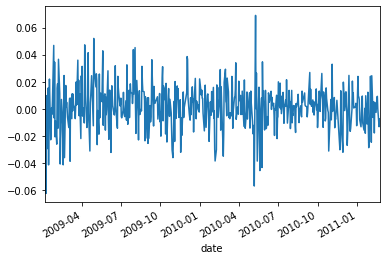

In [7]:
## Plot turkish lyra
tse = tse.set_index('date')

tse['TLISE'].plot()

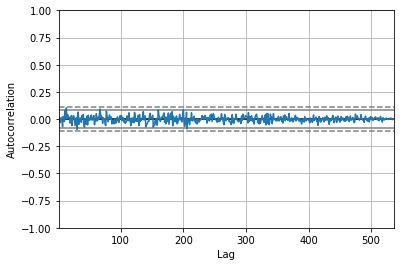

In [8]:
## Autocorrelation plot 
pd.plotting.autocorrelation_plot(tse['TLISE'])

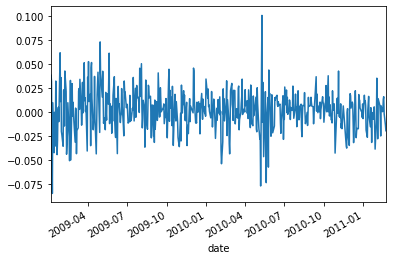

In [9]:
## USD
tse['USDISE'].plot()

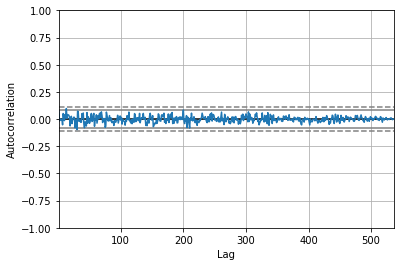

In [10]:
pd.plotting.autocorrelation_plot(tse['USDISE'])

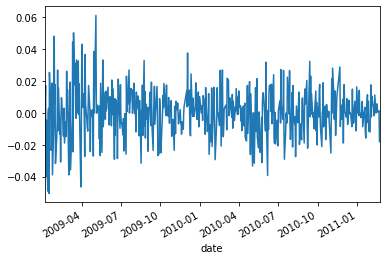

In [11]:
## NIKKEI index
tse['NIKKEI'].plot()

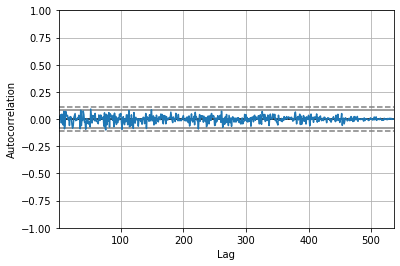

In [12]:
pd.plotting.autocorrelation_plot(tse['NIKKEI'])

In [13]:
## Volatility seems most interesting
## will construct local measure of volatility
## remove rolling window estimate (local centering)
## square the residuals
## here we are taking a rolling windows average over 7 days over each stock and remove it from the origianl stocks.


tse_trem = tse - tse.rolling("7D").mean()
tse_vol = tse_trem**2.

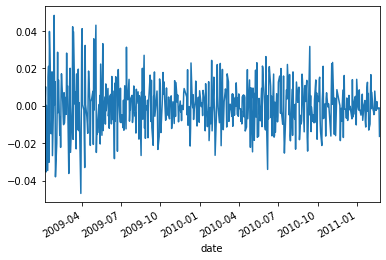

In [14]:
tse_trem['NIKKEI'].plot()

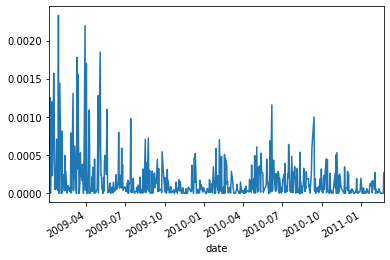

In [15]:
tse_vol['NIKKEI'].plot()

In [16]:
T,p = tse.shape

In [17]:
def const_wave(T,a,b):
    """build a single wavelet from a to b in a T vector"""
    wave = np.zeros(T)
    s1 = (b-a) // 2
    s2 = (b-a) - s1
    norm_C = (s1*s2 / (s1+s2))**0.5
    wave[a:a+s1] = norm_C / s1
    wave[a+s1:b] = -norm_C / s2
    return wave

In [18]:
def _const_wave_basis(T,a,b):
    """build the Haar wavelet basis of mother wavelets"""
    if b-a < 2:
        return []
    wave_basis = []
    wave_basis.append(const_wave(T,a,b))
    mid_pt = a + (b-a)//2
    wave_basis += _const_wave_basis(T,a,mid_pt)
    wave_basis += _const_wave_basis(T,mid_pt,b)
    return wave_basis

In [19]:
def const_wave_basis(T,a,b):
    """build the Haar wavelet basis of father wavelets"""
    father = np.ones(T) / T**0.5
    return [father] + _const_wave_basis(T,a,b)

In [20]:
# Construct discrete Haar wavelet basis
wave_basis = const_wave_basis(T,0,T)
W = np.array(wave_basis).T
W.shape

(536, 536)

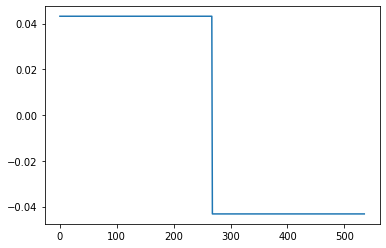

In [21]:
plt.plot(W[:,1])
# this will tell us the difference of the first half of the signal over time from the second half. Meaning that whether the first half is more signifact than the second half.

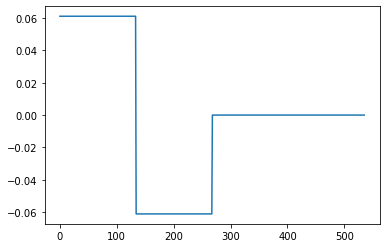

In [22]:
plt.plot(W[:,2])
# this will tell us the difference of the first quarter of the signal over time from the second quarter, disregarding the third and and the forth quarters. Meaning that whether the first quarter is more signifact than the second quarter.

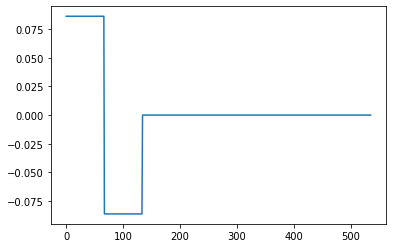

In [23]:
plt.plot(W[:,3])

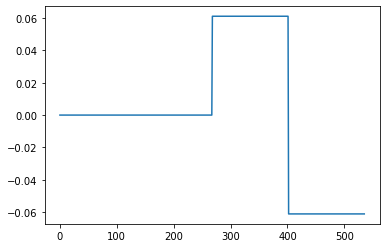

In [24]:
plt.plot(W[:,T//2+1])
# this will tell us the difference of the third quarter of the signal over time from the forth quarter, disregarding the first and and the second quarters. Meaning that whether the third quarter is more signifact than the forth quarter.
#note that this is just a π/2 phase shift of the 2nd wavelet. 

In [25]:
## Verify that it is orthonormal

np.abs(W.T @ W - np.eye(W.shape[1])).sum(), np.abs(W @ W.T - np.eye(W.shape[1])).sum()

(1.7616230886532e-13, 2.1148587375757294e-13)

In [26]:
def soft(y,lamb):
    """soft thresholding"""
    pos_part = (y - lamb) * (y > lamb)
    neg_part = (y + lamb) * (y < -lamb)
    return pos_part + neg_part

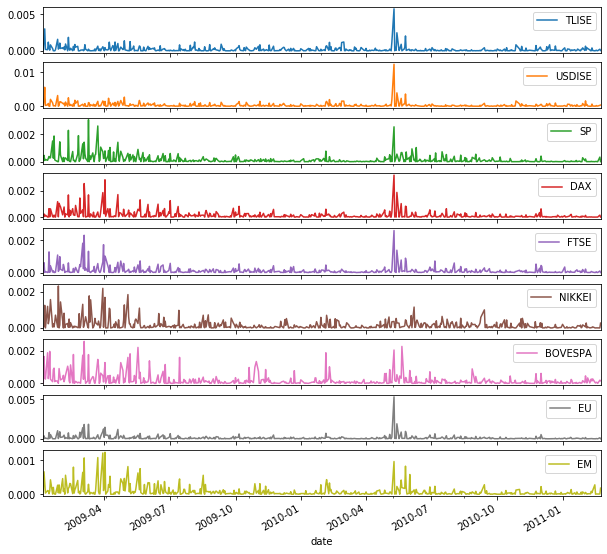

In [27]:
_ = tse_vol.plot(subplots=True,figsize=(10,10))

### Exercise 4.3

You can access the Y values with `tse_vol.values` which are the 9 stock indices over time.  Apply the wavelet transform constructed above and soft thresholding with different values of lambda.  Remark on the effect of changing lambda.  Find a range of lambdas that give reasonable values for the output of soft-thresholding.

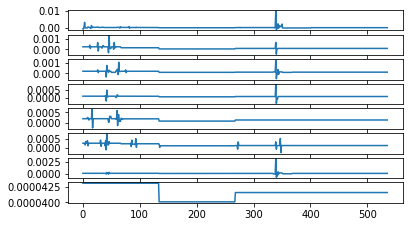

In [35]:
## my answer to Exercise 4.3

tse_wave = W.T @ tse_vol.values
lamb = .001
beta = soft(tse_wave,lamb)
tse_rec = W @ beta

for i in range (1,p):
    ax1=plt.subplot(9, 1, i+1)
    plt.plot(tse_rec[:,i])

In [29]:
## Solution to 4.3
## Make wavelet transformation and soft threshold

tse_wave = W.T @ tse_vol.values
lamb = .0001
tse_soft = soft(tse_wave,lamb)
tse_rec = W @ tse_soft
tse_den = tse_vol.copy()
tse_den.iloc[:,:] = tse_rec

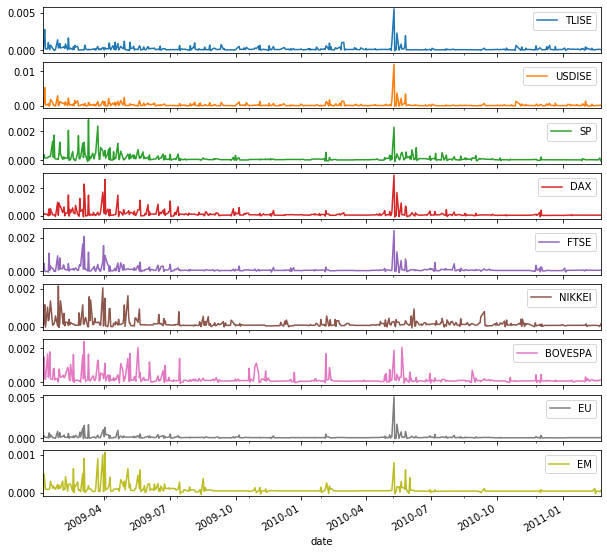

In [30]:
_ = tse_den.plot(subplots=True,figsize=(10,10))

In [31]:
## Make wavelet transformation and soft threshold

tse_wave = W.T @ tse_vol.values
lamb = .0005
tse_soft = soft(tse_wave,lamb)
tse_rec = W @ tse_soft
tse_den = tse_vol.copy()
tse_den.iloc[:,:] = tse_rec

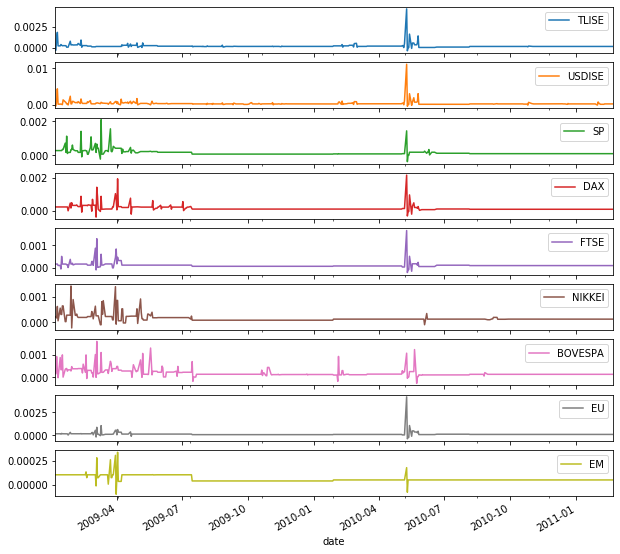

In [32]:
_ = tse_den.plot(subplots=True,figsize=(10,10))

In [33]:
## Make wavelet transformation and soft threshold

tse_wave = W.T @ tse_vol.values
lamb = .001
tse_soft = soft(tse_wave,lamb)
tse_rec = W @ tse_soft
tse_den = tse_vol.copy()
tse_den.iloc[:,:] = tse_rec

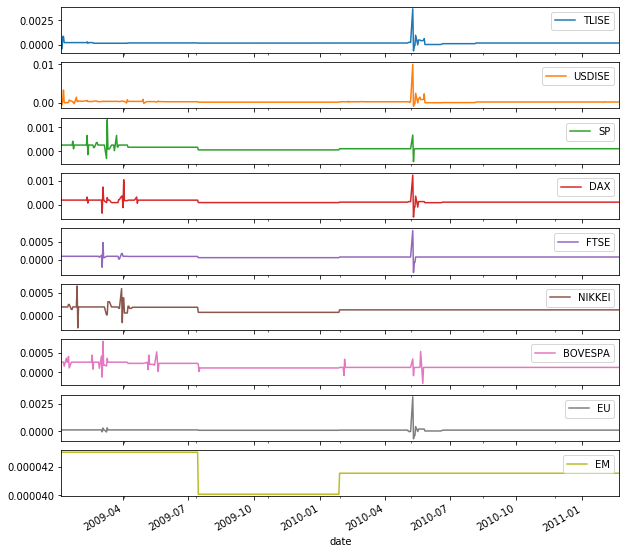

In [34]:
_ = tse_den.plot(subplots=True,figsize=(10,10))